# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 5_Machine Learning Overview and Algorithm

## 5. CVT & PCA



**Contents of this note refer to 1) book "Python Machine Learning"; 2) textbook "Data Science from Scratch"; 3) teaching materials at Department of Computer Science, William & Mary; 4) Python tutorial: https://docs.python.org/3/tutorial/**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

### What is Cross-Validation Test (CVT)?

CVT is also called K-fold Cross-Validation. 

Here, "the data is first partitioned into k equally (or nearly equally) sized segments or folds. Subsequently k iterations of training and validation are performed such that within each iteration a different fold of the data is held-out for validation while the remaining k − 1 folds are used for learning." (https://link.springer.com/referenceworkentry/10.1007/978-0-387-39940-9_565)

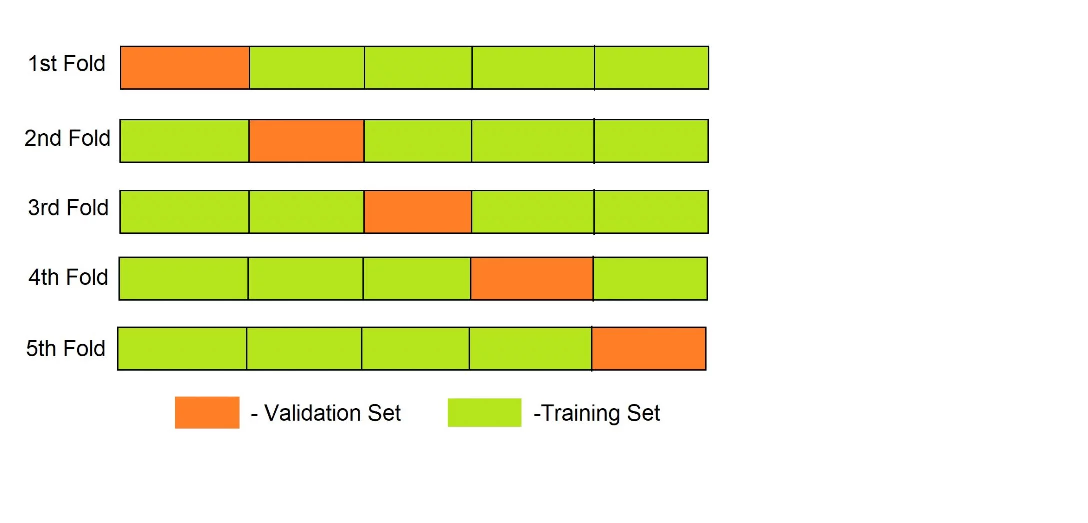
(Picture is from https://www.askpython.com/python/examples/k-fold-cross-validation)


The following example mainly refers to https://www.askpython.com/python/examples/k-fold-cross-validation

### Cross Validation on Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
#Loading the dataset
data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Implementing cross validation
k = 5  # number of fold
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
     
    DT.fit(X_train, y_train)
    pred_values = DT.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

### Cross Validation Using cross_val_score()

In [ ]:
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(DT , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

## Principal component analysis (PCA)

The following example refers to https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [ ]:
data = load_iris(as_frame = True)
iris_data = data.frame

# Label encoding since the algorithms we use 
# do not take non-numerical or boolean data as inputs
iris_data.replace({'Iris-setosa':0,'Iris-versicolor':1, 
                           'Iris-virginica':2},inplace=True)
iris_data.head()

In [ ]:
p = sns.pairplot(iris_data, hue = 'target')

In [ ]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
X = iris_data.iloc[:,:-1]
y = iris_data.iloc[:,-1]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

pca.get_covariance()

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(range(4), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Classification using only 2 principal components:

In [ ]:
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")

Classification using only 3 principal components:

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")

Classification using all 4 principal components:

In [ ]:
pca=PCA(n_components=4)
X_new=pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")